In [1]:
from scipy.io import netcdf
import numpy as np
from pylab import clf, plot, show, floor, ceil, imshow
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
#xlabel, ylabel, legend, savefig, colorbar, title, clim, pcolor, cm, contourf
import os
import csv
import sys
import glob
from netCDF4 import Dataset

from IPython.display import display, Math, Latex, Image
from mpl_toolkits.basemap import Basemap
import mpl_toolkits

sys.path.append('/noc/users/am8e13/PyNGL-1.4.0/lib/python2.7/site-packages/PyNGL/')
import Ngl
sys.path.append('/noc/users/am8e13/Python/')
import komod
sys.path.append('/noc/users/am8e13/Python/PyNIO-1.4.0/')
import Nio

from python_functions import *

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


In [2]:
# Readomg the Nemo and Noaa file
Nemo25 = nemo()
Nemo25.read_nemo('25')
Noaa = noaa()
Noaa.read_noaa()

In [3]:
run36 = spinup()
run36.readSpin('/scratch/general/am8e13/results36km_newspinup/spinup36km.nc')
run18 = spinup()
run18.readSpin('/scratch/general/am8e13/results18km_newspinup/spinup18km.nc')

/noc/users/am8e13/anaconda/lib/python2.7/site-packages/scipy/io/netcdf.py:287: RuntimeWarning: Cannot close a netcdf_file opened with mmap=True, when netcdf_variables or arrays referring to its data still exist. All data arrays obtained from such files refer directly to data on disk, and must be copied before the file can be cleanly closed. (See netcdf_file docstring for more information on mmap.)
  ), category=RuntimeWarning)


In [4]:
obcs = Obcs()
obcs.ReadData('/hpcdata/scratch/am8e13/cs_36km_tutorial/obcsdata/newdownloaded/',12,'_tempmod2',36)
woa = Woa()
phc = Phc()

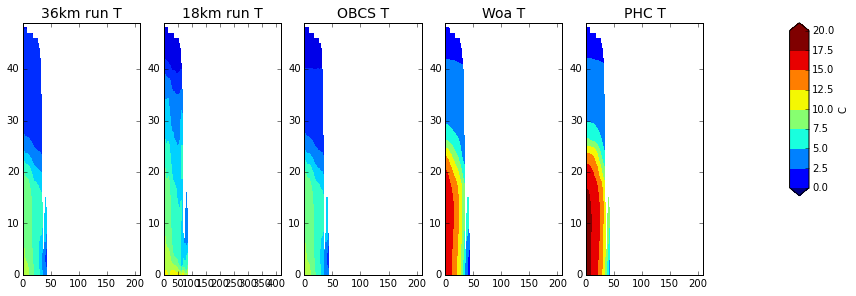

In [5]:
plot_obcs(run36,run18,obcs,woa,phc,loc='N',var='T',vmin=-1,vmax=18)

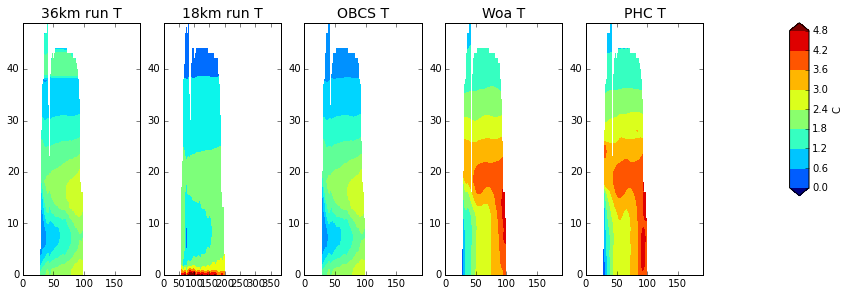

In [6]:
plot_obcs(run36,run18,obcs,woa,phc,loc='E',var='T',vmin=-1,vmax=5)

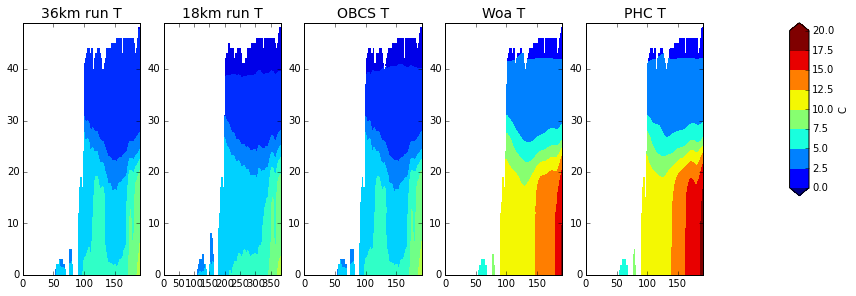

In [7]:
plot_obcs(run36,run18,obcs,woa,phc,loc='W',var='T',vmin=-1,vmax=18)

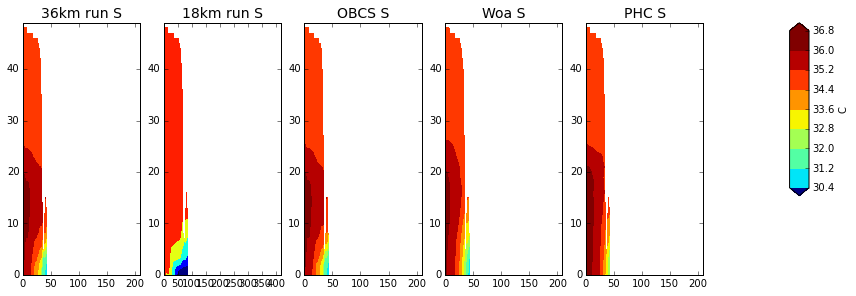

In [8]:
plot_obcs(run36,run18,obcs,woa,phc,loc='N',var='S',vmin=28,vmax=36)

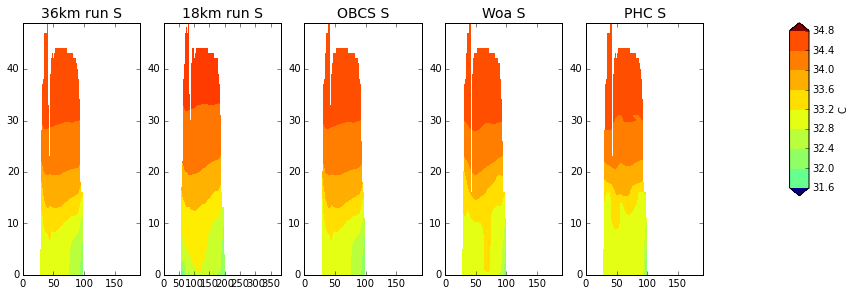

In [9]:
plot_obcs(run36,run18,obcs,woa,phc,loc='E',var='S',vmin=28,vmax=36)

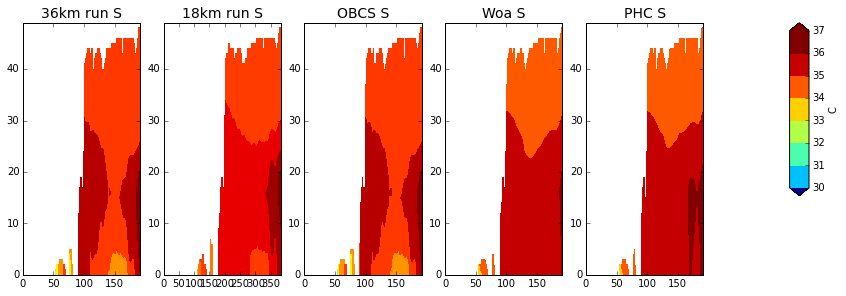

In [10]:
plot_obcs(run36,run18,obcs,woa,phc,loc='W',var='S',vmin=28,vmax=36)